In [115]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 96

In [0]:
import torch
import torchvision
from torchvision import models
import torchvision.transforms as T

from PIL import Image # Python Image Library (install: pip install pillow)
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import Rectangle, Circle, PathPatch # 사각형, 점 그릴 때 사용
import matplotlib

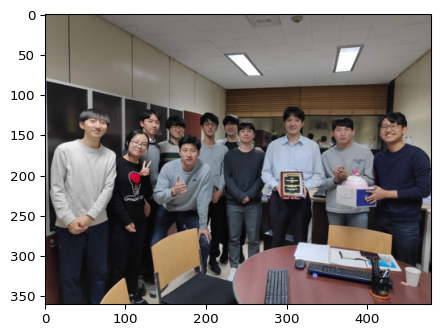

In [118]:
IMG_SIZE = 480

img = Image.open("/content/gdrive/My Drive/img1.jpg")
img = img.resize( (IMG_SIZE, int(img.height * IMG_SIZE / img.width)) )

plt.imshow(img)

In [0]:
model = models.detection.keypointrcnn_resnet50_fpn(pretrained=True)
model.eval()
pass

In [120]:
trans = T.ToTensor()
img_tensor = trans(img)

out = model([img_tensor])[0]
out.keys()

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/pytorch/torch/csrc/utils/python_arg_parser.cpp:756: UserWarning: This overload of nonzero is deprecated:
	nonzero(Tensor input, *, Tensor out)
Consider using one of the following signatures instead:
	nonzero(Tensor input, *, bool as_tuple)


dict_keys(['boxes', 'labels', 'scores', 'keypoints', 'keypoints_scores'])

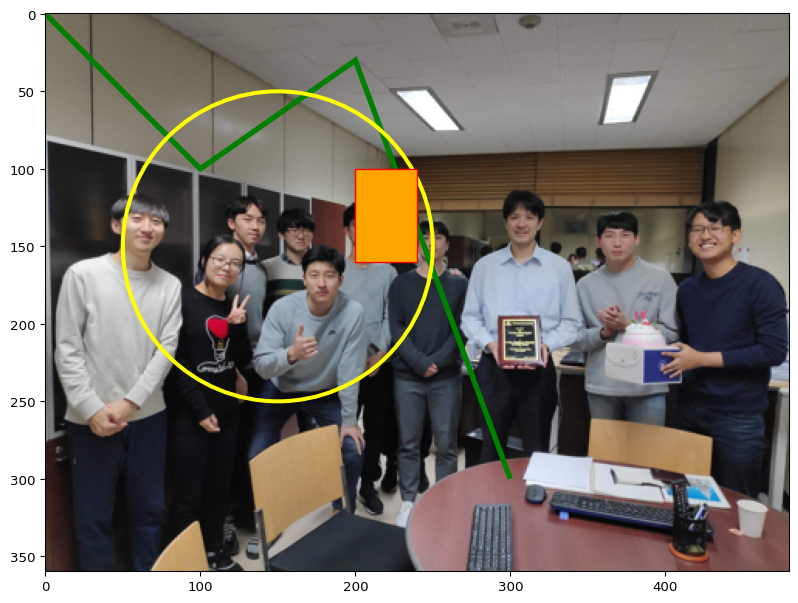

In [121]:
plt.figure(figsize=(10, 10))
ax = plt.gca()
ax.imshow(img)

line = Path([(0,0), (100, 100), (200, 30), (300, 300)])
ax.add_patch(PathPatch(line, edgecolor='green', facecolor='none', linewidth=4))
ax.add_patch(Circle((150, 150), radius=100, edgecolor='yellow', facecolor='none', linewidth=3))
ax.add_patch(Rectangle((200, 100), 40, 60, edgecolor='red', facecolor='orange'))

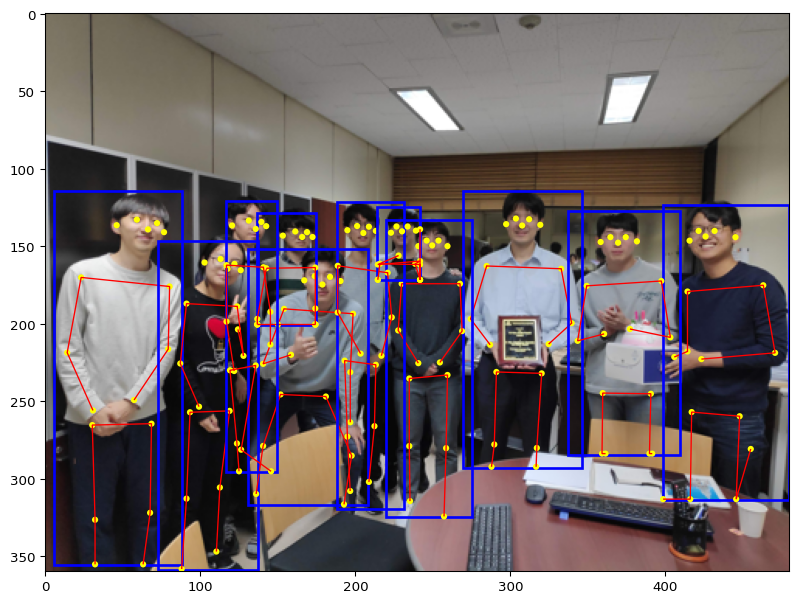

In [122]:
plt.figure(figsize=(10, 10))
ax = plt.gca()
ax.imshow(img)

zipped = zip(out['scores'].tolist(), out['boxes'].tolist(), out['keypoints'][:, :, :2].tolist())

for score, box, keys in zipped:
    if score < 0.85:
        continue
    
    rect = Rectangle((box[0], box[1]), # position
                     box[2]-box[0], # width
                     box[3]-box[1], # height
                     linewidth=2, facecolor='none', edgecolor='blue')
    ax.add_patch(rect)
    
    for k in keys:
        ax.add_patch(Circle((k[0], k[1]), radius=2, facecolor='yellow', edgecolor='none'))
    
    line = Path([keys[10], keys[8], keys[6], keys[5], keys[7], keys[9]])
    ax.add_patch(PathPatch(line, linewidth=1, edgecolor='red', facecolor='none'))
    line = Path([keys[16], keys[14], keys[12], keys[11], keys[13], keys[15]])
    ax.add_patch(PathPatch(line, linewidth=1, edgecolor='red', facecolor='none'))

In [0]:
model = models.segmentation.deeplabv3_resnet101(pretrained=True).eval()

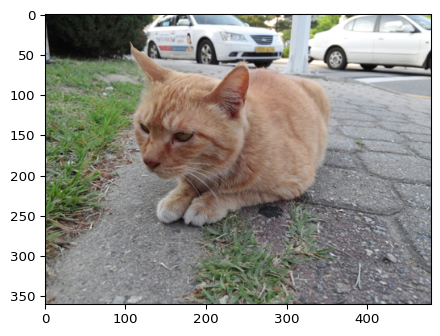

In [128]:
IMG_SIZE = 480

img = Image.open("/content/gdrive/My Drive/img2.jpg")
img = img.resize( (IMG_SIZE, int(img.height * IMG_SIZE / img.width)) )

plt.imshow(img)

In [0]:
trans = T.Compose([
                   T.ToTensor(),
                   T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                   ])

img_tensor = trans(img)

out = model(img_tensor.unsqueeze(0))['out']

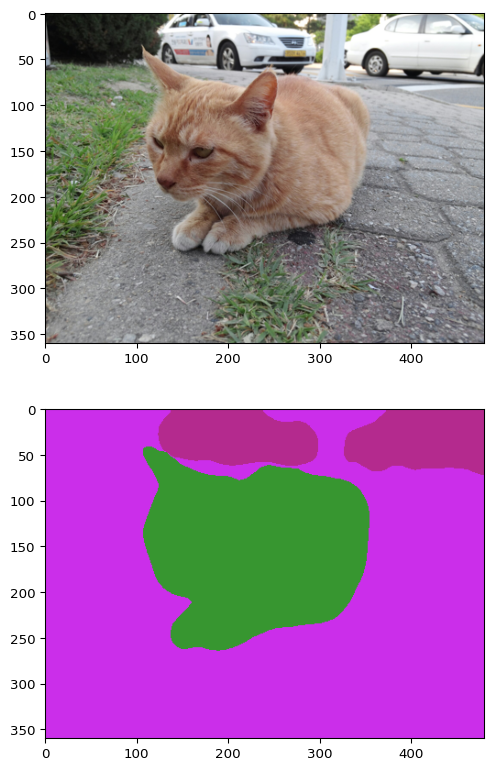

In [130]:
import numpy as np
import random as rnd

colors = [ (rnd.random(), rnd.random(), rnd.random()) for i in range(21)]

out_pred = out.argmax(1).squeeze()

rgb = np.zeros( (out_pred.shape[0], out_pred.shape[1], 3))

for i in range(out_pred.shape[0]):
    for j in range(out_pred.shape[1]):
        rgb[i][j] = colors[out_pred[i][j]]

pig, ax = plt.subplots(2,1, figsize=(10,10))
ax[0].imshow(img)
ax[1].imshow(rgb)
pig.show()

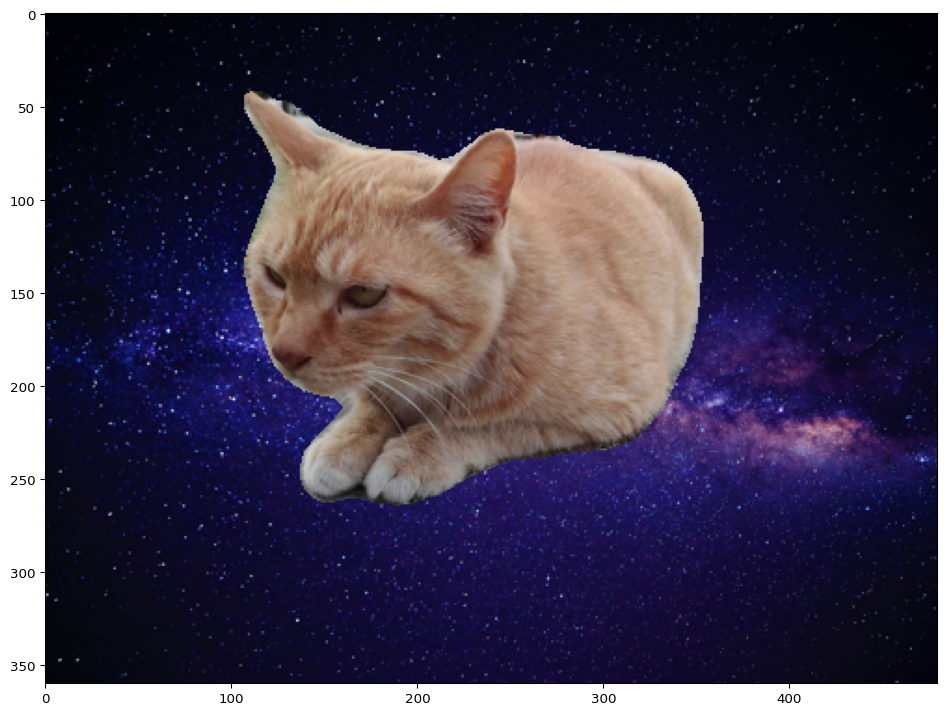

In [131]:
img_bg = Image.open("/content/gdrive/My Drive/bg.jpg")
img_bg = img_bg.resize( (img.width, img.height) )
img_bg = np.array(img_bg)

img_np = np.array(img)
img_np

for i in range(out_pred.shape[0]):
    for j in range(out_pred.shape[1]):
        if out_pred[i][j] != 8:
            img_np[i][j] = img_bg[i][j]
            
plt.figure(figsize=(12,12))
plt.imshow(img_np)